In [5]:
pip install xlrd

   ---------------------------------------- 0.0/96.5 kB ? eta -:--:--
   ---------------------------------------- 0.0/96.5 kB ? eta -:--:--
   ---- ----------------------------------- 10.2/96.5 kB ? eta -:--:--
   ------------ --------------------------- 30.7/96.5 kB 262.6 kB/s eta 0:00:01
   ---------------- ----------------------- 41.0/96.5 kB 330.3 kB/s eta 0:00:01
   ------------------------- -------------- 61.4/96.5 kB 365.7 kB/s eta 0:00:01
   ---------------------------------------- 96.5/96.5 kB 425.1 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [7]:
df=pd.read_excel("Dataset-SA.xls")

In [8]:
df.head()

,product_name,product_price,Rate,Review,Summary,Sentiment
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,super!,great cooler excellent air flow and for this p...,positive
1,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,awesome,best budget 2 fit cooler nice cooling,positive
2,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,the quality is good but the power of air is de...,positive
3,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1,useless product,very bad product its a only a fan,negative
4,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,ok ok product,neutral


In [9]:
df = df.dropna(subset=['Review'])

In [10]:
df['Review'] = df['Review'].astype(str)

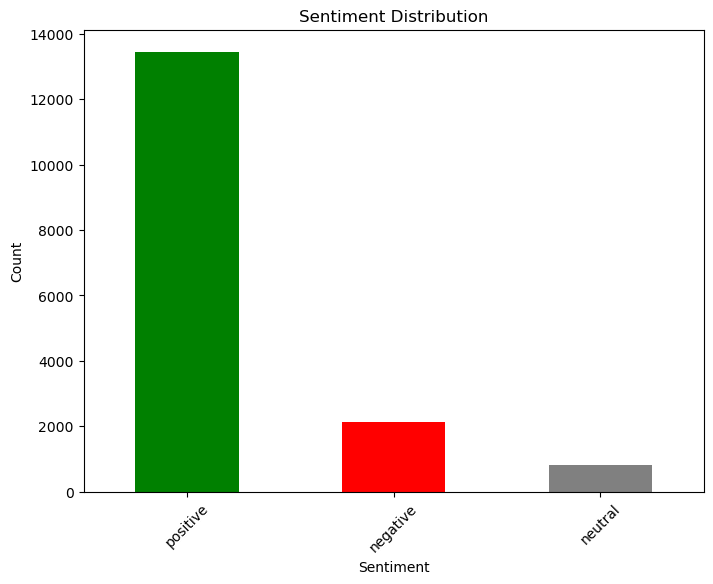

In [14]:
sentiment_counts = df['Sentiment'].value_counts()
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['green', 'red', 'grey'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

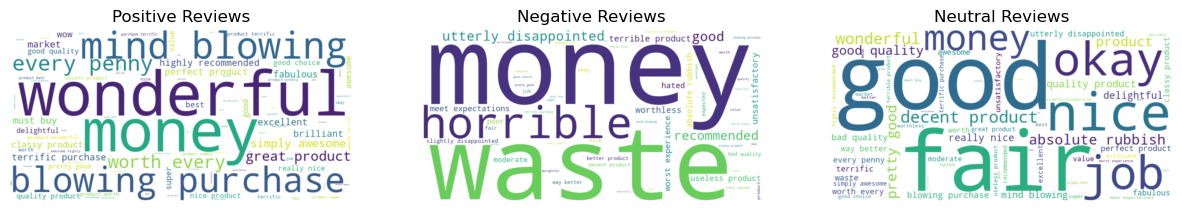

In [15]:
positive_reviews = ' '.join(df[df['Sentiment'] == 'positive']['Review'])
negative_reviews = ' '.join(df[df['Sentiment'] == 'negative']['Review'])
neutral_reviews = ' '.join(df[df['Sentiment'] == 'neutral']['Review'])

wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_reviews)
wordcloud_neutral = WordCloud(width=800, height=400, background_color='white').generate(neutral_reviews)

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Positive Reviews')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Negative Reviews')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(wordcloud_neutral, interpolation='bilinear')
plt.title('Neutral Reviews')
plt.axis('off')

plt.show()

<Figure size 800x600 with 0 Axes>

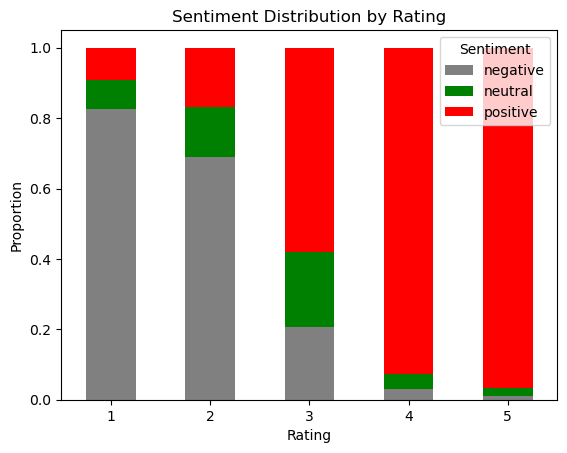

In [16]:
plt.figure(figsize=(8, 6))
sentiment_by_rating = df.groupby('Rate')['Sentiment'].value_counts(normalize=True).unstack()
sentiment_by_rating.plot(kind='bar', stacked=True, color=['grey', 'green', 'red'])
plt.title('Sentiment Distribution by Rating')
plt.xlabel('Rating')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.legend(title='Sentiment')
plt.show()